In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.decomposition import PCA
import warnings   
from yellowbrick.cluster import KElbowVisualizer
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [2]:
files  = [file for file in os.listdir('data')]
print(files)

['c_0000.csv', 'c_0100.csv', 'c_0200.csv', 'c_0300.csv', 'c_0400.csv', 'c_0500.csv', 'c_0600.csv', 'c_0700.csv', 'c_0800.csv', 'c_0900.csv', 'c_1000.csv', 'c_1100.csv', 'c_1200.csv', 'c_1300.csv', 'c_1400.csv', 'c_1500.csv', 'c_1600.csv', 'c_1700.csv', 'c_1800.csv']


In [3]:
dfs = []
for file in files : 
    data = pd.read_csv('data/'+file)
    dfs.append(data)

data = pd.concat(dfs,ignore_index=True)


In [4]:
data.shape

(1215714, 8)

In [5]:
data.drop('id',axis=1,inplace=True)


In [6]:
data.head()

,x,y,z,vx,vy,vz,m
0,0.485939,-0.524359,-0.531982,0.461539,-0.033776,-0.322765,0.000016
1,-0.065961,0.080844,-0.276031,-0.575780,1.107815,-0.293408,0.000016
2,-0.034809,0.076795,-0.390880,-0.553991,-0.173861,0.059251,0.000016
3,1.502104,1.442983,1.449747,-0.090266,0.326612,-0.310594,0.000016
4,-0.009554,0.538341,-0.267264,0.011855,-0.011874,-0.405565,0.000016


In [7]:
data.isna().sum()

x     0
y     0
z     0
vx    0
vy    0
vz    0
m     0
dtype: int64

In [8]:
for i in data:   
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3 - q1
    lower_bound_gc = q1 - iqr*1.5
    upper_bound_gc = q3 + 1.5*iqr
    data = data[(data[i] >= lower_bound_gc) & (data[i] <= upper_bound_gc)]

In [9]:
data.shape

(893436, 7)

array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>,
        <Axes: title={'center': 'z'}>],
       [<Axes: title={'center': 'vx'}>, <Axes: title={'center': 'vy'}>,
        <Axes: title={'center': 'vz'}>],
       [<Axes: title={'center': 'm'}>, <Axes: >, <Axes: >]], dtype=object)

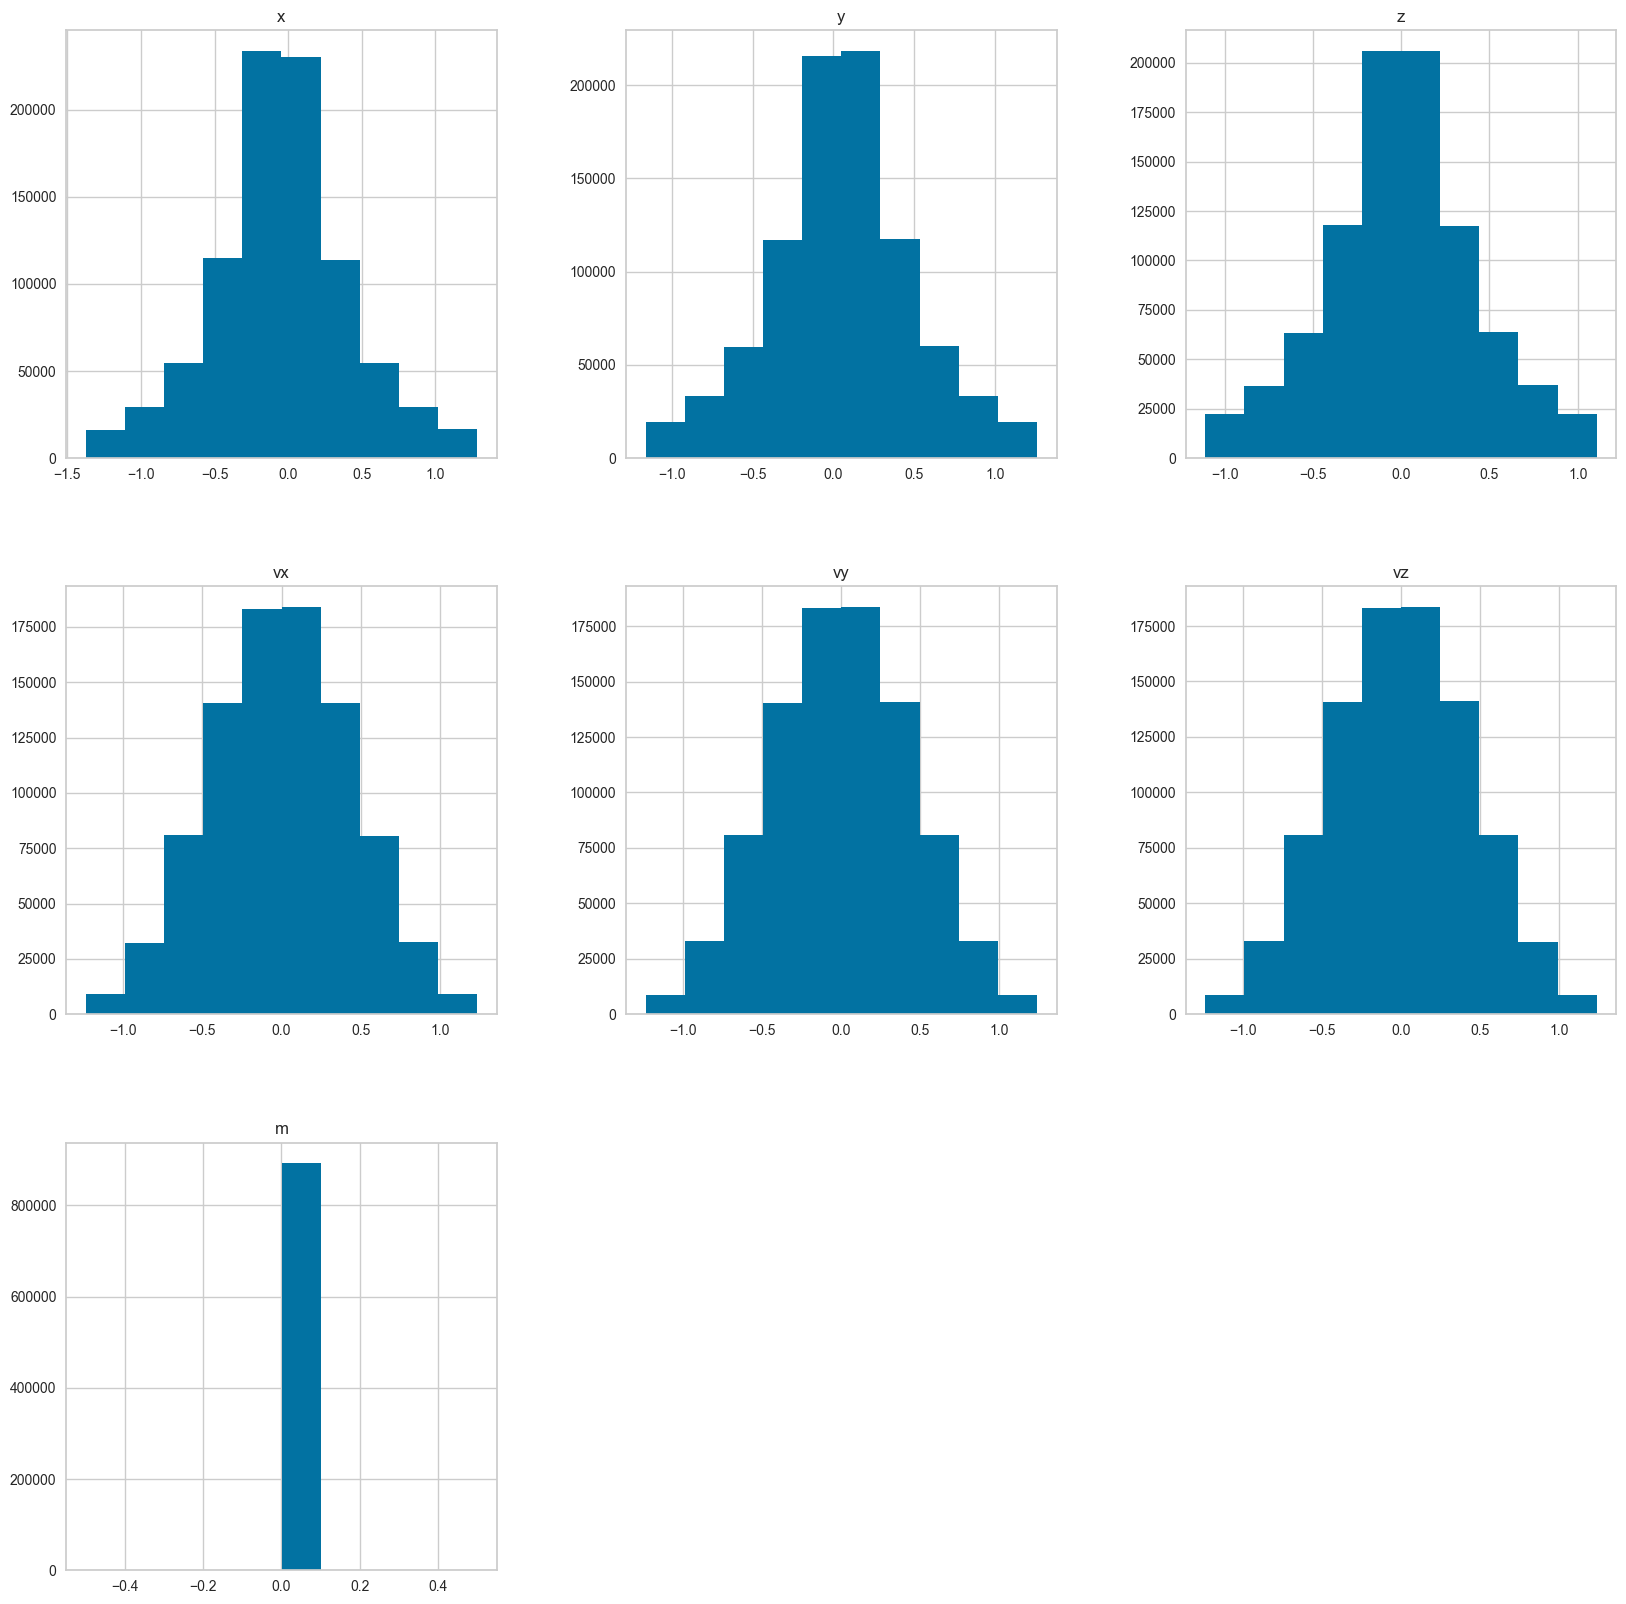

In [10]:
data.hist(figsize=(20,20))

<Axes: >

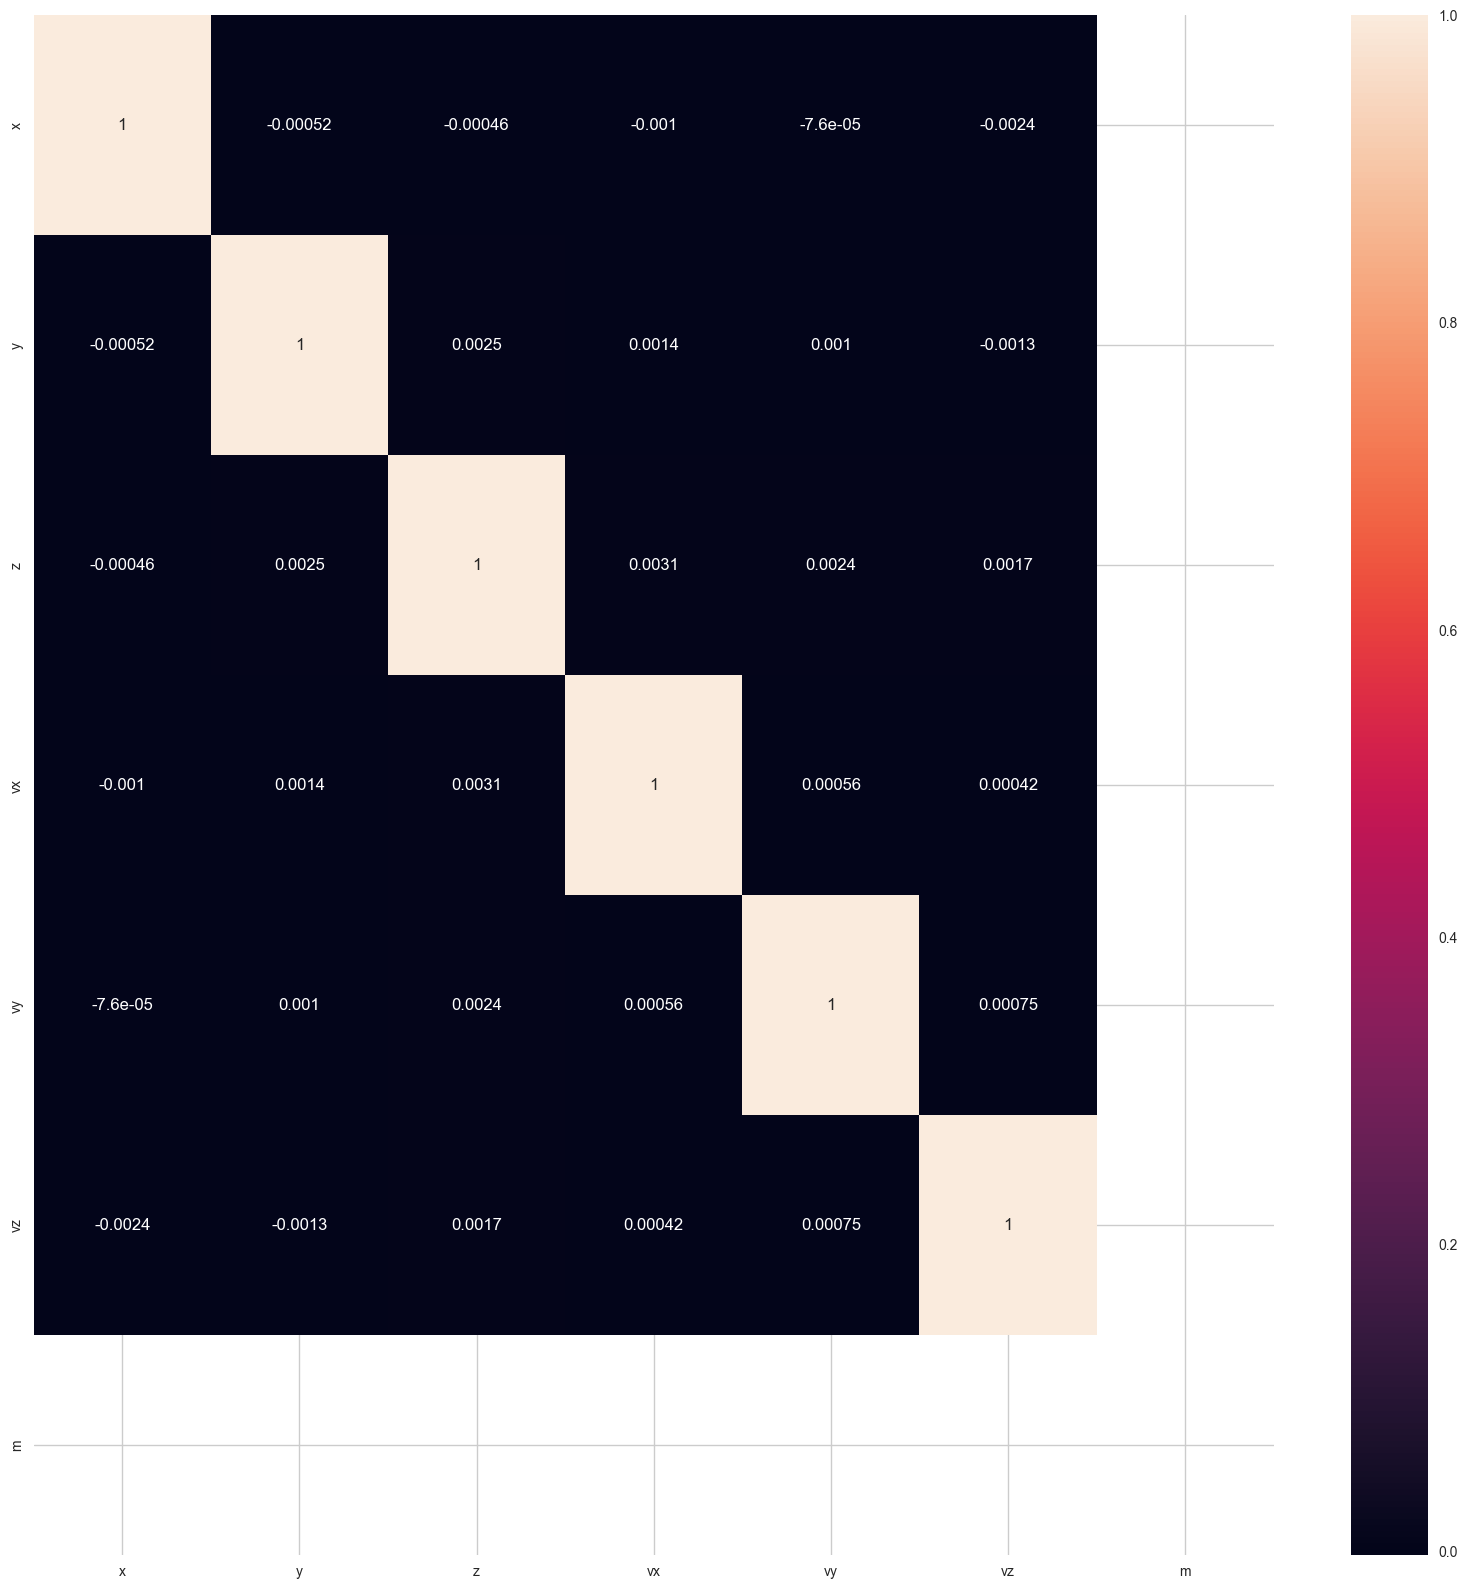

In [11]:
matrix = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(matrix,annot=True)


In [12]:
kmeans=KMeans().fit(data)

In [13]:
score=[]
K=range(1,20)

for i in K:
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(data)
    score.append(kmeans.inertia_)

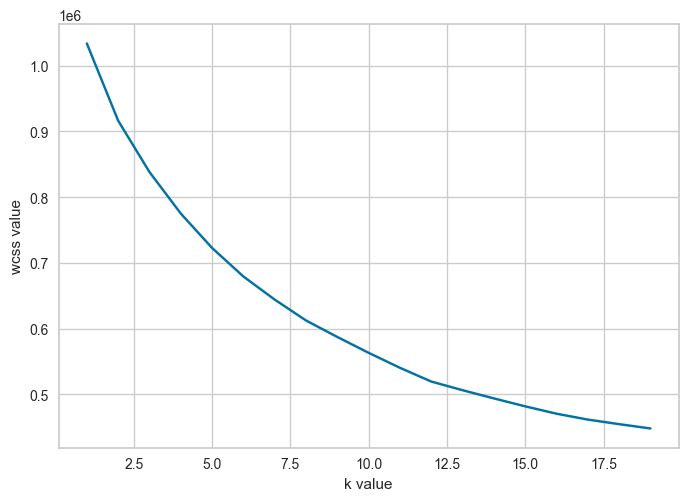

In [14]:
#visualize;

plt.plot(K,score)
plt.xlabel("k value")
plt.ylabel("wcss value");

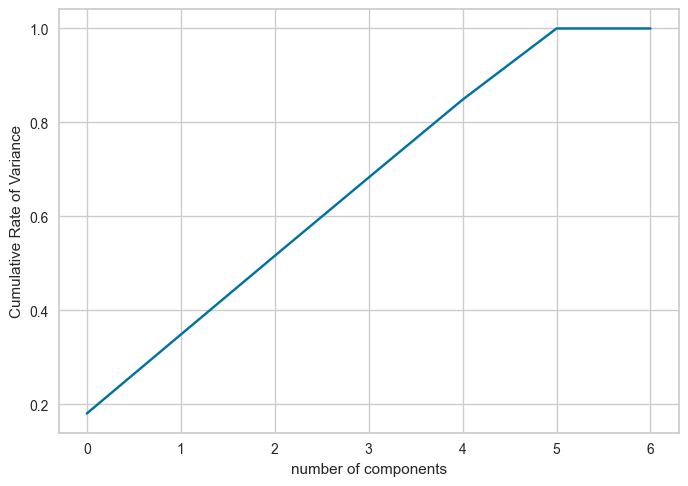

In [17]:
#optimum component
pca=PCA().fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel("number of components")
plt.ylabel("Cumulative Rate of Variance")
plt.show()

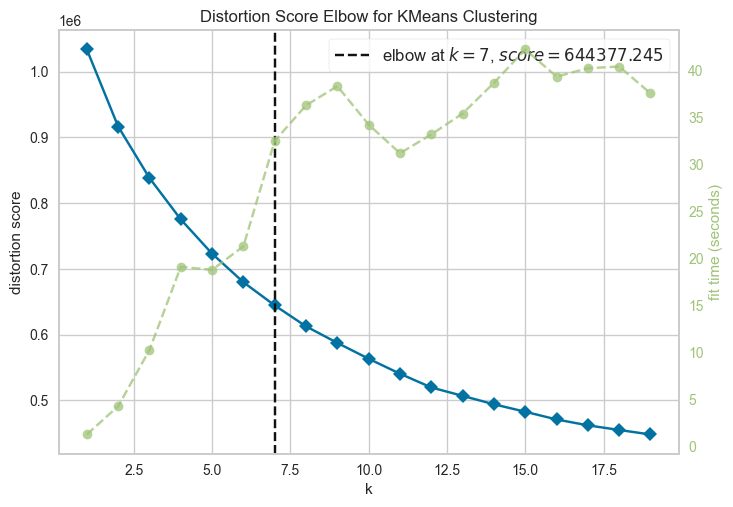

In [18]:
kmeans=KMeans()
visu=KElbowVisualizer(kmeans,k=(1,20))   
visu.fit(data)
visu.poof();

In [20]:
# final model
kmeans=KMeans(n_clusters=7,init="k-means++").fit(data)

In [21]:
cluster=kmeans.labels_

In [23]:
data["cluster no"]=cluster
data.head(10)

,x,y,z,vx,vy,vz,m,cluster no
0,0.485939,-0.524359,-0.531982,0.461539,-0.033776,-0.322765,0.000016,3
1,-0.065961,0.080844,-0.276031,-0.575780,1.107815,-0.293408,0.000016,2
2,-0.034809,0.076795,-0.390880,-0.553991,-0.173861,0.059251,0.000016,4
4,-0.009554,0.538341,-0.267264,0.011855,-0.011874,-0.405565,0.000016,5
5,-0.356017,-0.045705,0.335006,-0.709008,-0.649903,0.397949,0.000016,4
7,-0.916657,0.643472,-0.146350,-0.511860,0.220190,-0.529937,0.000016,1
9,-0.976209,0.445163,-0.705493,-0.120242,-0.231255,-0.227857,0.000016,1
10,0.333829,-0.027976,-0.049035,-0.404203,0.422303,-0.475672,0.000016,4
12,0.659480,0.495849,0.817856,0.080642,0.926544,0.494239,0.000016,2
14,0.235473,-0.990754,-0.182444,-0.069146,-0.166599,-0.682076,0.000016,3


In [24]:
centers=kmeans.cluster_centers_


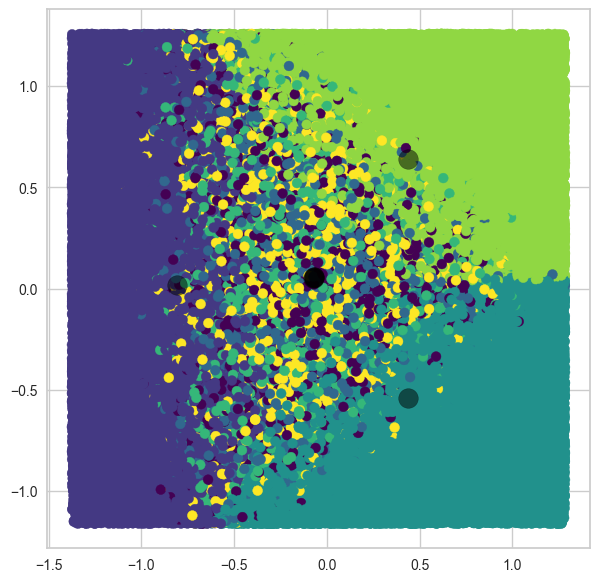

In [27]:
plt.figure(figsize=(7,7))
plt.scatter(data.iloc[:,0],data.iloc[:,1],c=cluster,s=50,cmap="viridis")
plt.scatter(centers[:,0],centers[:,1],c="black",s=200,alpha=0.5);